train.csv shape is  (1697533, 9)
test.csv shape is  (300000, 2)

   Id   ProductId          UserId  HelpfulnessNumerator  \
0   0  0005019281   ADZPIG9QOCDG5                     0   
1   1  0005019281  A35947ZP82G7JH                     0   
2   2  0005019281  A3UORV8A9D5L2E                     0   
3   3  0005019281  A1VKW06X1O2X7V                     0   
4   4  0005019281  A3R27T4HADWFFJ                     0   

   HelpfulnessDenominator  Score        Time  \
0                       0    4.0  1203984000   
1                       0    3.0  1388361600   
2                       0    3.0  1388361600   
3                       0    5.0  1202860800   
4                       0    4.0  1387670400   

                                        Summary  \
0                     good version of a classic   
1                        Good but not as moving   
2         Winkler's Performance was ok at best!   
3  It's an enjoyable twist on the classic story   
4                              Best 

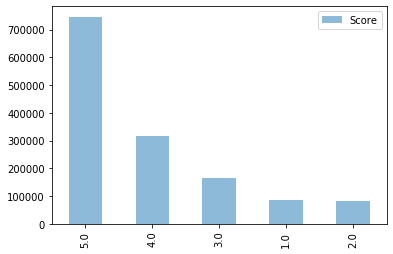

In [8]:
'''
1. Find regression of each features to see the correlation between the ratings 
2. 
'''

import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

trainingSet = pd.read_csv("./data/train.csv")
testingSet = pd.read_csv("./data/test.csv")

#trainingSet = trainingSet[:5000]
#testingSet = testingSet[:5000]

print("train.csv shape is ", trainingSet.shape)
print("test.csv shape is ", testingSet.shape)

print()

print(trainingSet.head())
print()

print("this is testingset")
print(testingSet.head())

print()

print(trainingSet.describe())

trainingSet['Score'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.show()


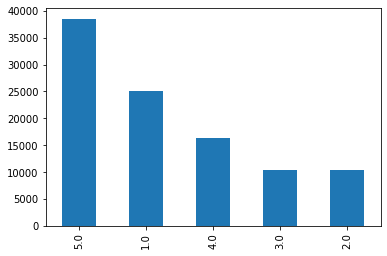

In [2]:
trainingSet['Dislike'] = trainingSet['HelpfulnessDenominator'] - trainingSet['HelpfulnessNumerator']
trainingSet = trainingSet.loc[trainingSet['HelpfulnessDenominator'] > 15]
#trainingSet = trainingSet.loc[trainingSet['Dislike'] < (len(trainingSet['HelpfulnessDenominator']) **0.8)]
trainingSet['Score'].value_counts().plot.bar()
#print(len(trainingSet[trainingSet['Dislike'] > 10]))

24629


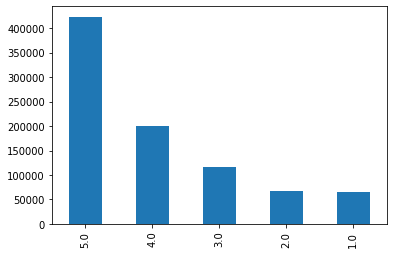

In [3]:
trainingSet = pd.read_csv("./data/train.csv")
trainingSet['Dislike'] = trainingSet['HelpfulnessDenominator'] - trainingSet['HelpfulnessNumerator']
trainingSet = trainingSet.loc[trainingSet['HelpfulnessDenominator'] != 0]
trainingSet = trainingSet.loc[trainingSet['Dislike'] < (len(trainingSet['HelpfulnessDenominator']) **0.2)]
trainingSet['Score'].value_counts().plot.bar()
print(len(trainingSet[trainingSet['Dislike'] > 10]))

52147


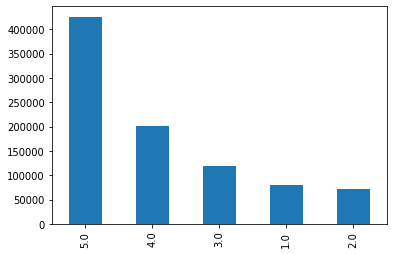

In [2]:
trainingSet['Dislike'] = trainingSet['HelpfulnessDenominator'] - trainingSet['HelpfulnessNumerator']
trainingSet = trainingSet.loc[trainingSet['HelpfulnessDenominator'] < 20]
#trainingSet = trainingSet.loc[trainingSet['Dislike'] < (len(trainingSet['HelpfulnessDenominator']) **0.5)]
trainingSet['Score'].value_counts().plot.bar()
print(len(trainingSet[trainingSet['Dislike'] > 10]))
#trainingSet = trainingSet.loc[(trainingSet['HelpfulnessDenominator'] - trainingSet['HelpfulnessNumerator']) < 10]

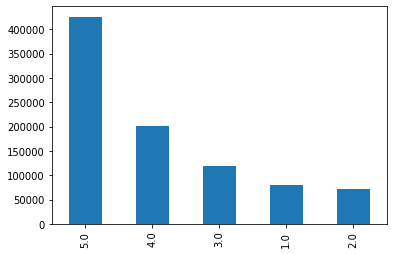

In [11]:
trainingSet = trainingSet.loc[trainingSet['Dislike'] < (len(trainingSet['HelpfulnessDenominator']) **0.2) ]
trainingSet['Score'].value_counts().plot.bar()

In [ ]:
#trainingSet = trainingSet.drop(['HelpfulnessDenominator','HelpfulnessNumerator','Score','Time'], axis=1)
# trainingSet = trainingSet.drop(['ProductId','Id','UserId'], axis=1)
# na = trainingSet.columns[trainingSet.isna().any()].tolist()
# print(na)

# is_NaN = trainingSet.isnull()
# row_has_NaN = is_NaN.any(axis=1)
# rows_with_NaN = trainingSet[row_has_NaN]
# print(rows_with_NaN)
#trainingSet[trainingSet['Summary'] == float("Nan")]


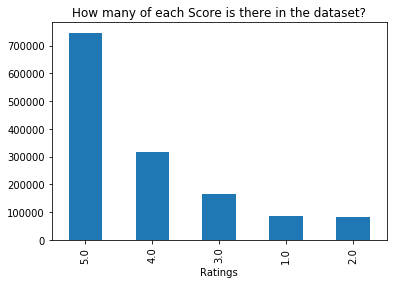

In [20]:
trainingSet = pd.read_csv("./data/train.csv")
plt.title('How many of each Score is there in the dataset?')
plt.xlabel("Ratings")
trainingSet['Score'].value_counts().plot.bar()

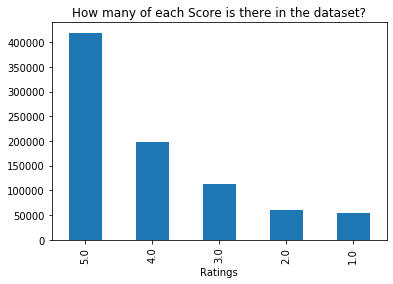

In [23]:
plt.title('How many of each Score is there in the dataset?')
plt.xlabel("Ratings")
trainingSet['Score'].value_counts().plot.bar()

In [ ]:
plt.title('Which users have rated the most products')
plt.xlabel("User ID")
trainingSet['UserId'].value_counts(sort=True).nlargest(5).plot.bar()


In [ ]:
plt.title('Top 10 products with reviews')
plt.xlabel("Product ID")
print(trainingSet['ProductId'].value_counts(sort=True).nlargest(10))
trainingSet['ProductId'].value_counts(sort=True).nlargest(10).plot.bar()


In [ ]:
trainingSet[['Score', 'ProductId']].groupby('ProductId').mean().nlargest(25, 'Score').plot(kind = 'bar', legend = True, alpha =0.5)
plt.title("Top 25 best rated Products")

In [ ]:
trainingSet[['Score', 'ProductId']].groupby('ProductId').mean().nsmallest(25, 'Score').plot(kind = 'bar', legend = True, alpha =0.5)
plt.title("Top 25 worst rated Products")

In [ ]:
#trainingSet[trainingSet['UserId'].isin(trainingSet['UserId'].value_counts().nsmallest(25).index.tolist())].plot.bar()#'Score', 'ProductId']].groupby('ProductId').mean().nsmallest(25, 'Score').plot(kind = 'bar', legend = True, alpha =0.5)
#print(trainingSet['UserId'].value_counts().nsmallest(25).index.tolist)

# fig,ax = plt.subplots()
# reviews = []
# for i in range(1,6):
#     score = trainingSet.where(trainingSet['Score'] == float(i))
#     reviews.append(score['SummaryLength'].dropna())

# plt.hist(reviews, bins=10,label=list(range(1,6)))
# ax.legend(loc='upper left')
# plt.title('Summary length per Score')
# plt.show

topWords = []
for i in range(1,6):
    words = pd.Series(word_tokenize(' '.join(trainingSet.where(trainingSet['Score'] == float(i))['Summary'].dropna()).lower())).value_counts()
    topWordsForScore = words.where(~words.index.isin(stopwords.words()))
    print("Top 100 words for score = ", i)
    print(topWordsForScore.nlargest(15).index.tolist())
    print()
    topWords.append(topWordsForScore)
    
for i in range(len(topWords)):
    fig, ax = plt.subplots()
    allExcepti = topWords[:i] + topWords[i+1:]
    flattened = pd.concat(allExcepti)
    topWords[i] = topWords[i].where(~topWords[i].index.isin(flattened.nlargest(10).index.tolist()))
    print("Top 100 words sort of unique to Score = ", i+1)
    print(topWords[i].nlargest(10).index.tolist())
    print()
    topWords[i].nlargest(10).plot(kind = 'bar',ax=ax)
    plt.title("Top 100 word counts unique to Score =" + str(i+1))
    plt.show()
    


In [ ]:
trainingSet[['Score', 'HelpfulnessNumerator']].groupby('Score').mean().plot.bar()
plt.title("Mean Helpfulness Numerator per Score")

In [ ]:
#avg rating of the product with most reviews 
top_product = trainingSet['ProductId'].value_counts(sort=True).nlargest(10).keys()
#print(top_product)

i = 1
for ids in top_product:
    val = trainingSet[trainingSet['ProductId'] == ids]['Score'].value_counts()
    print(str(i)+".", ids, 'ratings:')
    print(val)
    avg_rating = trainingSet[trainingSet['ProductId'] == ids]['Score'].mean()
    print('average rating: ',round(avg_rating,2))
    print()
    i+=1
    
#labels = trainingSet[trainingSet['ProductId'] == ids]['Score'].value_counts().keys() # ratings 1 ~ 5

'''
labels = top_product # ratings 1 ~ 5

men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
men_means1 = [22, 33, 34, 37, 28]
women_means1 = [34, 23, 35, 24, 23]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
ax.bar(labels, men_means, width, label='Men')
ax.bar(labels, women_means, width, bottom=men_means,
       label='Women')
ax.bar(labels, men_means1, width, label='Men')
ax.bar(labels, women_means1, width, bottom=men_means,
       label='Women')
ax.bar(labels, men_means, width, label='Men')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()
plt.show()
'''

#ratings = trainingSet[trainingSet['ProductId'] == 'B003EYVXV4']['Score'].value_counts()
#print(ratings)
#avg = trainingSet[trainingSet['ProductId'] == 'B003EYVXV4']['Score'].mean()
#print("Average rating: ",avg)

# Data Preprocessing

In [3]:
# Inversitgate the missing values 
#print("# of missing values for each columns:")
#print(trainingSet.isna().sum())

# We do not want to delete the whole row with missing values
# Because there might be some crucial information in the other columns
# So we simply replace with empty string 

print(trainingSet.isna().sum())
#trainingSet = trainingSet[~pd.isnull(trainingSet['Text'])] #Delete the rows with nan 
trainingSet['Text'].loc[trainingSet['Text'].isna()] = ''#trainingSet['Summary'].loc[trainingSet['Text'].isna()]
trainingSet['Summary'].loc[trainingSet['Summary'].isna()] = ''
trainingSet["Text"] = trainingSet["Text"].str.lower()
trainingSet["Text"] = trainingSet["Text"].str.replace(r"[^a-zA-Z ]+", "").str.strip()
print("After removing the nan")
print(trainingSet.isna().sum())




Id                            0
ProductId                     0
UserId                        0
HelpfulnessNumerator          0
HelpfulnessDenominator        0
Score                     21825
Time                          0
Summary                       2
Text                         11
Dislike                       0
dtype: int64
After removing the nan
Id                            0
ProductId                     0
UserId                        0
HelpfulnessNumerator          0
HelpfulnessDenominator        0
Score                     21825
Time                          0
Summary                       0
Text                          0
Dislike                       0
dtype: int64


In [7]:
print(trainingSet.head())

   Id   ProductId          UserId  HelpfulnessNumerator  \
0   0  0005019281   ADZPIG9QOCDG5                     0   
1   1  0005019281  A35947ZP82G7JH                     0   
2   2  0005019281  A3UORV8A9D5L2E                     0   
3   3  0005019281  A1VKW06X1O2X7V                     0   
4   4  0005019281  A3R27T4HADWFFJ                     0   

   HelpfulnessDenominator  Score        Time  \
0                       0    4.0  1203984000   
1                       0    3.0  1388361600   
2                       0    3.0  1388361600   
3                       0    5.0  1202860800   
4                       0    4.0  1387670400   

                                        Summary  \
0                     good version of a classic   
1                        Good but not as moving   
2         Winkler's Performance was ok at best!   
3  It's an enjoyable twist on the classic story   
4                              Best Scrooge yet   

                                                T

In [ ]:
# Vectorize the texts 

# vectorizer = TfidfVectorizer(input='content', analyzer='word', stop_words='english').fit(X_train['Text'])

# X_train_vect = vectorizer.transform(X_train['Text'])
# X_train_df = pd.DataFrame(X_train_vect.toarray(), columns=vectorizer.get_feature_names()).set_index(X_train.index.values)
# X_train_with_tfidf = X_train.join(X_train_df)

# # now apply that same set of features to X_submission
# X_submission_vect = vectorizer.transform(X_submission['Text'])
# X_submission_df = pd.DataFrame(X_submission_vect.toarray(), columns=vectorizer.get_feature_names()).set_index(X_submission.index.values)
# X_submission_with_tfidf = X_submission.join(X_submission_df)




In [4]:
X_test = pd.merge(trainingSet, testingSet, left_on='Id', right_on='Id')
# print(X_test.columns)

X_test = X_test.drop(columns=['Score_x'])
X_test = X_test.rename(columns={'Score_y': 'Score'})

print(X_test.columns)
X_test.to_csv("./data/X_submission.csv", index=False)

X_train = trainingSet[trainingSet['Score'].notnull()]
# print(trainingSet.shape)
# print(X_train.shape)
X_train.to_csv("./data/X_train.csv", index=False)


Index(['Id', 'ProductId', 'UserId', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Time', 'Summary', 'Text', 'Dislike',
       'Score'],
      dtype='object')


In [5]:
prediction = pd.read_csv("./data/X_submission.csv")
prediction['Score'] = 4.0
#print(prediction['Score'])
submission = prediction[['Id', 'Score']]
print(submission.head())
submission.to_csv("./data/submission.csv", index=False)


    Id  Score
0  186    4.0
1  243    4.0
2  303    4.0
3  534    4.0
4  558    4.0


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors, KDTree, NearestCentroid, RadiusNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Load files into DataFrames
X_train = pd.read_csv("./data/X_train.csv")
X_submission = pd.read_csv("./data/X_submission.csv")


vectorizer = TfidfVectorizer(max_features = 20000, stop_words='english', ngram_range=(1,3), analyzer = 'word')
#X_train = vectorizer.fit_transform(X_train['Text'])
y = X_train['Score']
X_train = vectorizer.fit_transform(X_train['Text'].values.astype('U'))

# Split training set into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X_train,y,test_size=0.2,random_state=0)


# now apply that same set of features to X_submission
#X_submission_vect = vectorizer.transform(X_submission['Text'])
#X_submission_df = pd.DataFrame(np.array(X_submission_vect), columns=vectorizer.get_feature_names()).set_index(X_submission.index.values)
X_submission_with_tfidf = vectorizer.fit_transform(X_submission['Text'].values.astype('U'))
'''
# Process the DataFrames
# This is where you can do more feature extraction
X_train_processed = X_train_with_tfidf.drop(columns=['Id', 'ProductId', 'UserId', 'Summary'])
X_test_processed = X_test.drop(columns=['Id', 'ProductId', 'UserId', 'Summary'])
X_submission_processed = X_submission_with_tfidf.drop(columns=['Id', 'ProductId', 'UserId', 'Summary', 'Score'])
'''

# Learn the model
model = LinearSVC(C = 15, class_weight ="balanced")
#model = KNeighborsClassifier(n_neighbors=3).fit(X_train_processed, Y_train)
model.fit(X_train,Y_train)
#model = RadiusNeighborsClassifier.fit(X_train_processed, Y_train)

# Predict the score using the model
Y_test_predictions = model.predict(X_test)

print(classification_report(Y_test,Y_test_predictions))
# X_submission_with_tfidf['Score'] = model.predict(X_submission_with_tfidf)

model = LogisticRegression(C = 10, class_weight ="balanced")
#model = KNeighborsClassifier(n_neighbors=3).fit(X_train_processed, Y_train)
model.fit(X_train,Y_train)
#model = RadiusNeighborsClassifier.fit(X_train_processed, Y_train)

# Predict the score using the model
Y_test_predictions = model.predict(X_test)

print(classification_report(Y_test,Y_test_predictions))

# # Evaluate your model on the testing set
# print("RMSE on testing set = ", mean_squared_error(Y_test, Y_test_predictions))

# # Plot a confusion matrix
# cm = confusion_matrix(Y_test, Y_test_predictions)

# sns.heatmap(cm, annot=True)
# plt.title('Confusion matrix of the classifier')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

# # # Create the submission file
# submission = X_submission_with_tfidf[['Id', 'Score']]
# submission.to_csv("./data/submission.csv", index=False)

C:\Users\Soo Whan Park\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Soo Whan Park\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Soo Whan Park\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


              precision    recall  f1-score   support

         1.0       0.65      0.63      0.64      5017
         2.0       0.23      0.25      0.24      2081
         3.0       0.20      0.24      0.22      2080
         4.0       0.31      0.33      0.32      3204
         5.0       0.69      0.63      0.66      7757

    accuracy                           0.50     20139
   macro avg       0.42      0.42      0.42     20139
weighted avg       0.52      0.50      0.51     20139

              precision    recall  f1-score   support

         1.0       0.69      0.70      0.69      5017
         2.0       0.27      0.26      0.27      2081
         3.0       0.25      0.26      0.26      2080
         4.0       0.36      0.35      0.36      3204
         5.0       0.72      0.72      0.72      7757

    accuracy                           0.56     20139
   macro avg       0.46      0.46      0.46     20139
weighted avg       0.56      0.56      0.56     20139



In [21]:
model = LogisticRegression(solver = 'sag',multi_class = 'multinomial',class_weight ="balanced")
#model = KNeighborsClassifier(n_neighbors=3).fit(X_train_processed, Y_train)
model.fit(X_train,Y_train)
#model = RadiusNeighborsClassifier.fit(X_train_processed, Y_train)

# Predict the score using the model
Y_test_predictions = model.predict(X_test)

print(classification_report(Y_test,Y_test_predictions))

              precision    recall  f1-score   support

         1.0       0.71      0.65      0.68      3669
         2.0       0.26      0.37      0.31      1303
         3.0       0.24      0.32      0.27      1326
         4.0       0.37      0.40      0.39      2328
         5.0       0.76      0.63      0.69      5579

    accuracy                           0.55     14205
   macro avg       0.47      0.48      0.47     14205
weighted avg       0.59      0.55      0.56     14205



RMSE on testing set =  1.5368687621033814


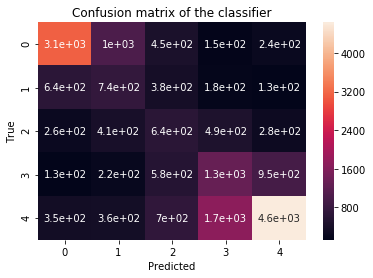

In [7]:
# Evaluate your model on the testing set
print("RMSE on testing set = ", mean_squared_error(Y_test, Y_test_predictions))

# Plot a confusion matrix
cm = confusion_matrix(Y_test, Y_test_predictions)

sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

RMSE on testing set =  1.8550510383667722


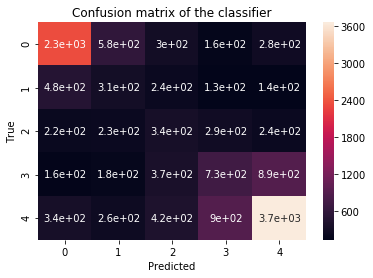

In [15]:
# Evaluate your model on the testing set
print("RMSE on testing set = ", mean_squared_error(Y_test, Y_test_predictions))

# Plot a confusion matrix
cm = confusion_matrix(Y_test, Y_test_predictions)

sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# # Create the submission file
#submission = X_submission_with_tfidf[['Id', 'Score']]
#submission.to_csv("./data/submission.csv", index=False)

In [24]:
X_submission = vectorizer.fit_transform(X_submission['Text'].values.astype('U'))
Y_test_predictions = model.predict(X_submission)


In [28]:
print("RMSE on testing set = ", mean_squared_error(Y_test, Y_test_predictions))

# Plot a confusion matrix
cm = confusion_matrix(Y_test, Y_test_predictions)

sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [14205, 15322]

In [27]:
submission = X_submission[['Id', 'Score']]
submission.to_csv("./data/submission.csv", index=False)

IndexError: invalid index